In [1]:
import pandas as pd

In [2]:
Ozone_df = pd.read_csv("Ozone_df_final.csv")
Ozone_df['date_local'] = pd.to_datetime(Ozone_df['date_local'])
Ozone_df.dtypes
Ozone_df.head(2)

,date_local,Ozone Mean (ppm),County,Ozone Max (ppm)
0,2019-01-01,0.026388,Maricopa,0.039045
1,2019-01-02,0.023136,Maricopa,0.033955


In [3]:
Ozone_df.isnull().sum()  #no null values in dataframe

date_local          0
Ozone Mean (ppm)    0
County              0
Ozone Max (ppm)     0
dtype: int64

In [4]:
#create dummy variables
dummy_county = pd.get_dummies(Ozone_df['County'], drop_first=False)
dummy_county.shape
dummy_county.value_counts().sum()
dummy_county.head()


,Cook,Dallas,Harris,LosAngeles,Maricopa,MiamiDade,Orange,Queens,Riverside,SanDiego
0,0,0,0,0,1,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0


In [5]:
#concat dummy_county to Ozone_df
Ozone_Dummy_df = pd.concat([Ozone_df, dummy_county], axis=1)
Ozone_Dummy_df.head()

,date_local,Ozone Mean (ppm),County,Ozone Max (ppm),Cook,Dallas,Harris,LosAngeles,Maricopa,MiamiDade,Orange,Queens,Riverside,SanDiego
0,2019-01-01,0.026388,Maricopa,0.039045,0,0,0,0,1,0,0,0,0,0
1,2019-01-02,0.023136,Maricopa,0.033955,0,0,0,0,1,0,0,0,0,0
2,2019-01-03,0.018154,Maricopa,0.034952,0,0,0,0,1,0,0,0,0,0
3,2019-01-04,0.019730,Maricopa,0.037333,0,0,0,0,1,0,0,0,0,0
4,2019-01-05,0.021591,Maricopa,0.033773,0,0,0,0,1,0,0,0,0,0


In [6]:
#0.06ppm results in inflammation of the respiratory system; seems like a reasonable threshold
Ozone_Dummy_df['ozone_threshold'] = [1 if x >=0.06 else 0 for x in Ozone_Dummy_df['Ozone Max (ppm)']]
Ozone_Dummy_df.head()

,date_local,Ozone Mean (ppm),County,Ozone Max (ppm),Cook,Dallas,Harris,LosAngeles,Maricopa,MiamiDade,Orange,Queens,Riverside,SanDiego,ozone_threshold
0,2019-01-01,0.026388,Maricopa,0.039045,0,0,0,0,1,0,0,0,0,0,0
1,2019-01-02,0.023136,Maricopa,0.033955,0,0,0,0,1,0,0,0,0,0,0
2,2019-01-03,0.018154,Maricopa,0.034952,0,0,0,0,1,0,0,0,0,0,0
3,2019-01-04,0.019730,Maricopa,0.037333,0,0,0,0,1,0,0,0,0,0,0
4,2019-01-05,0.021591,Maricopa,0.033773,0,0,0,0,1,0,0,0,0,0,0


In [7]:
Ozone_Dummy_df['ozone_threshold'].value_counts()

#3121 total days for max not exceeding 0.06pp; 529 total days exceeding max ppm

0    3121
1     529
Name: ozone_threshold, dtype: int64

In [8]:
#add county population (millions of people)
LA = 10.5
Cook = 5.1
Harris = 4.7
Maricopa = 4.5
SD = 3.3
Orange = 3.2
MiamiDade = 2.7
Dallas = 2.6
Queens = 2.3
Riverside = 2.5
n=365
county_list = ['Maricopa', 'LosAngeles', 'MiamiDade', 'Dallas', 'SanDiego', 'Cook', 'Harris', 'Riverside', 'Queens', 'Orange']
print(county_list)

['Maricopa', 'LosAngeles', 'MiamiDade', 'Dallas', 'SanDiego', 'Cook', 'Harris', 'Riverside', 'Queens', 'Orange']


In [9]:
pop_list = list([[Maricopa]*n + [LA]*n + [MiamiDade]*n + [Dallas]*n + [SD]*n + [Cook]*n + [Harris]*n + [Riverside]*n + [Queens]*n + [Orange]*n])
print(pop_list)
print(len(pop_list))
populations = pd.DataFrame(pop_list)
populations = populations.T
populations.head()

[[4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5

,0
0,4.5
1,4.5
2,4.5
3,4.5
4,4.5


In [10]:
populations.columns = ['population_millions']
#populations = populations.reset_index(drop=True, inplace=True)
pops = populations
pops.head()

,population_millions
0,4.5
1,4.5
2,4.5
3,4.5
4,4.5


In [11]:
#add population_millions to df
frames = [Ozone_Dummy_df, pops]
df_result = pd.concat(frames, axis=1)
df_result.tail()

,date_local,Ozone Mean (ppm),County,Ozone Max (ppm),Cook,Dallas,Harris,LosAngeles,Maricopa,MiamiDade,Orange,Queens,Riverside,SanDiego,ozone_threshold,population_millions
3645,2019-12-27,0.014583,Orange,0.032333,0,0,0,0,0,0,1,0,0,0,0,3.2
3646,2019-12-28,0.017681,Orange,0.042667,0,0,0,0,0,0,1,0,0,0,0,3.2
3647,2019-12-29,0.018472,Orange,0.042333,0,0,0,0,0,0,1,0,0,0,0,3.2
3648,2019-12-30,0.023986,Orange,0.038333,0,0,0,0,0,0,1,0,0,0,0,3.2
3649,2019-12-31,0.027347,Orange,0.040000,0,0,0,0,0,0,1,0,0,0,0,3.2


In [12]:
#converting date to month only - categorize
df_result['date_local'] = pd.to_datetime(df_result['date_local'])
df_result['month'] = pd.DatetimeIndex(df_result['date_local']).month
df_result['month'] = df_result['month'].replace([1,2,3,4,5,6,7,8,9,10,11,12],
                                               ['Jan','Feb','Mar','Apr','May','Jun',
                                               'Jul','Aug','Sep','Oct','Nov','Dec'])
df_result.head(2)
df_result.month.unique()

array(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep',
       'Oct', 'Nov', 'Dec'], dtype=object)

In [13]:
#categorize the population at less or more than 4mill
df_result['popSize'] = ["less4million" if x < 4.0 else "greater4mill" for x in df_result['population_millions']]
df_result.popSize.unique()
df_result.head(2)

,date_local,Ozone Mean (ppm),County,Ozone Max (ppm),Cook,Dallas,Harris,LosAngeles,Maricopa,MiamiDade,Orange,Queens,Riverside,SanDiego,ozone_threshold,population_millions,month,popSize
0,2019-01-01,0.026388,Maricopa,0.039045,0,0,0,0,1,0,0,0,0,0,0,4.5,Jan,greater4mill
1,2019-01-02,0.023136,Maricopa,0.033955,0,0,0,0,1,0,0,0,0,0,0,4.5,Jan,greater4mill


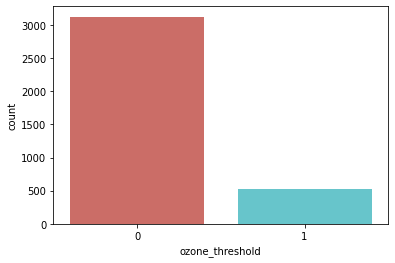

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(x='ozone_threshold',data=df_result, palette='hls')
plt.show()
#plt.savefig('count_plot')

In [15]:
df_result.groupby('ozone_threshold').mean()

,Ozone Mean (ppm),Ozone Max (ppm),Cook,Dallas,Harris,LosAngeles,Maricopa,MiamiDade,Orange,Queens,Riverside,SanDiego,population_millions
ozone_threshold,,,,,,,,,,,,,
0,0.027678,0.041624,0.107978,0.103172,0.105095,0.085870,0.090356,0.115027,0.095162,0.103172,0.082666,0.111503,4.048126
1,0.039840,0.067294,0.052930,0.081285,0.069943,0.183365,0.156900,0.011342,0.128544,0.081285,0.202268,0.032136,4.682042


In [16]:
df_result.groupby('County').mean()

,Ozone Mean (ppm),Ozone Max (ppm),Cook,Dallas,Harris,LosAngeles,Maricopa,MiamiDade,Orange,Queens,Riverside,SanDiego,ozone_threshold,population_millions
County,,,,,,,,,,,,,,
Cook,0.026952,0.039492,1,0,0,0,0,0,0,0,0,0,0.076712,5.1
Dallas,0.028637,0.044542,0,1,0,0,0,0,0,0,0,0,0.117808,2.6
Harris,0.023718,0.040079,0,0,1,0,0,0,0,0,0,0,0.101370,4.7
LosAngeles,0.029189,0.050538,0,0,0,1,0,0,0,0,0,0,0.265753,10.5
Maricopa,0.033439,0.050884,0,0,0,0,1,0,0,0,0,0,0.227397,4.5
MiamiDade,0.027246,0.036416,0,0,0,0,0,1,0,0,0,0,0.016438,2.7
Orange,0.029645,0.049982,0,0,0,0,0,0,1,0,0,0,0.186301,3.2
Queens,0.027490,0.042882,0,0,0,0,0,0,0,1,0,0,0.117808,2.3
Riverside,0.036718,0.053200,0,0,0,0,0,0,0,0,1,0,0.293151,2.5


In [17]:
df_result.groupby('month').mean()

,Ozone Mean (ppm),Ozone Max (ppm),Cook,Dallas,Harris,LosAngeles,Maricopa,MiamiDade,Orange,Queens,Riverside,SanDiego,ozone_threshold,population_millions
month,,,,,,,,,,,,,,
Apr,0.035557,0.050153,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.150000,4.14
Aug,0.031493,0.052116,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.332258,4.14
Dec,0.020379,0.034173,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.003226,4.14
Feb,0.025904,0.038765,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.010714,4.14
Jan,0.022056,0.035601,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.000000,4.14
Jul,0.033353,0.052205,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.322581,4.14
Jun,0.034621,0.051030,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.303333,4.14
Mar,0.032685,0.047171,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.087097,4.14
May,0.034056,0.046982,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.112903,4.14


Text(0, 0.5, 'Frequency of Days >0.06ppm')

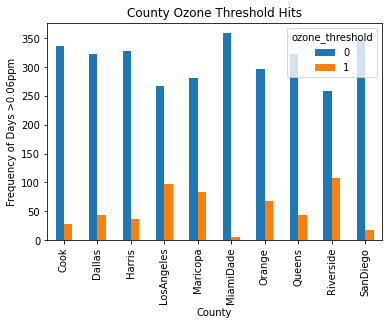

In [18]:
pd.crosstab(df_result.County,df_result.ozone_threshold).plot(kind='bar')
plt.title('County Ozone Threshold Hits')
plt.xlabel('County')
plt.ylabel('Frequency of Days >0.06ppm')
#plt.savefig('purchase_fre_job')

#Riverside, Maricopa, and LA counties seem to be the worst for ozone health days

Text(0, 0.5, 'Frequency')

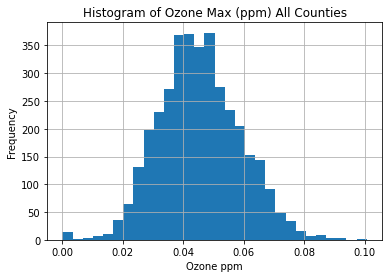

In [19]:
df_result['Ozone Max (ppm)'].hist(bins=30)
plt.title("Histogram of Ozone Max (ppm) All Counties")
plt.xlabel('Ozone ppm')
plt.ylabel('Frequency')

In [20]:
df = df_result[['Ozone Mean (ppm)','County','Ozone Max (ppm)','ozone_threshold',
               'month','popSize']]
df.head()
df.shape
df.columns
df.head()

,Ozone Mean (ppm),County,Ozone Max (ppm),ozone_threshold,month,popSize
0,0.026388,Maricopa,0.039045,0,Jan,greater4mill
1,0.023136,Maricopa,0.033955,0,Jan,greater4mill
2,0.018154,Maricopa,0.034952,0,Jan,greater4mill
3,0.019730,Maricopa,0.037333,0,Jan,greater4mill
4,0.021591,Maricopa,0.033773,0,Jan,greater4mill


In [21]:
#create dummy variables
cat_vars=['County','month','popSize']
for var in cat_vars:
    cat_list='var'+'_'+var
    cat_list = pd.get_dummies(df[var], prefix=var)
    df_1=df.join(cat_list)
    df_update=df_1

In [22]:
df_update.head()

,Ozone Mean (ppm),County,Ozone Max (ppm),ozone_threshold,month,popSize,popSize_greater4mill,popSize_less4million
0,0.026388,Maricopa,0.039045,0,Jan,greater4mill,1,0
1,0.023136,Maricopa,0.033955,0,Jan,greater4mill,1,0
2,0.018154,Maricopa,0.034952,0,Jan,greater4mill,1,0
3,0.019730,Maricopa,0.037333,0,Jan,greater4mill,1,0
4,0.021591,Maricopa,0.033773,0,Jan,greater4mill,1,0


In [23]:
data = df_update
data_dummy = pd.get_dummies(data, columns=['County','month','popSize'], drop_first=True)
data_dummy.head()

,Ozone Mean (ppm),Ozone Max (ppm),ozone_threshold,popSize_greater4mill,popSize_less4million,County_Dallas,County_Harris,County_LosAngeles,County_Maricopa,County_MiamiDade,...,month_Feb,month_Jan,month_Jul,month_Jun,month_Mar,month_May,month_Nov,month_Oct,month_Sep,popSize_less4million
0,0.026388,0.039045,0,1,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
1,0.023136,0.033955,0,1,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
2,0.018154,0.034952,0,1,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
3,0.019730,0.037333,0,1,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
4,0.021591,0.033773,0,1,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0


In [24]:
Ozone_PreProcessed_df = data_dummy

In [25]:
#scaling Ozone Mean (ppm), Ozone Max (ppm)
from sklearn.preprocessing import StandardScaler
#scaler = StandardScaler()

scaled_features = Ozone_PreProcessed_df.copy()
col_names = ['Ozone Mean (ppm)', 'Ozone Max (ppm)']
features = scaled_features[col_names]
scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)

In [26]:
Ozone_PreProcessed_df.head()

,Ozone Mean (ppm),Ozone Max (ppm),ozone_threshold,popSize_greater4mill,popSize_less4million,County_Dallas,County_Harris,County_LosAngeles,County_Maricopa,County_MiamiDade,...,month_Feb,month_Jan,month_Jul,month_Jun,month_Mar,month_May,month_Nov,month_Oct,month_Sep,popSize_less4million
0,0.026388,0.039045,0,1,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
1,0.023136,0.033955,0,1,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
2,0.018154,0.034952,0,1,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
3,0.019730,0.037333,0,1,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
4,0.021591,0.033773,0,1,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0


In [27]:
Ozone_PreProcessed_df[['Ozone Mean (ppm)', 'Ozone Max (ppm)']] = scaler.transform(Ozone_PreProcessed_df[['Ozone Mean (ppm)', 'Ozone Max (ppm)']])

In [28]:
Ozone_PreProcessed_df.head(2)

,Ozone Mean (ppm),Ozone Max (ppm),ozone_threshold,popSize_greater4mill,popSize_less4million,County_Dallas,County_Harris,County_LosAngeles,County_Maricopa,County_MiamiDade,...,month_Feb,month_Jan,month_Jul,month_Jun,month_Mar,month_May,month_Nov,month_Oct,month_Sep,popSize_less4million
0,-0.329758,-0.468495,0,1,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
1,-0.681090,-0.847152,0,1,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0


In [29]:
y = Ozone_PreProcessed_df.ozone_threshold
X = Ozone_PreProcessed_df.loc[:, data_dummy.columns != 'ozone_threshold']

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Split the data into a training and test set.
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=5)


In [31]:
Ozone_PreProcessed_df.to_csv(r'C:/Users/srubin/Desktop/Springboard/CapstoneProject2/Ozone_PreProcessed_df.csv')

In [33]:
Ozone_PreProcessed_df.head(10)

,Ozone Mean (ppm),Ozone Max (ppm),ozone_threshold,popSize_greater4mill,popSize_less4million,County_Dallas,County_Harris,County_LosAngeles,County_Maricopa,County_MiamiDade,...,month_Feb,month_Jan,month_Jul,month_Jun,month_Mar,month_May,month_Nov,month_Oct,month_Sep,popSize_less4million
0,-0.329758,-0.468495,0,1,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
1,-0.681090,-0.847152,0,1,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
2,-1.219302,-0.772934,0,1,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
3,-1.049085,-0.595841,0,1,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
4,-0.848015,-0.860675,0,1,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
5,-0.300753,-0.404580,0,1,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
6,-0.998508,-0.353545,0,1,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
7,-1.370285,-0.820105,0,1,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
8,-1.304289,-0.877579,0,1,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
9,-1.678238,-1.530087,0,1,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
